In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/riiid-test-answer-prediction/example_sample_submission.csv
/kaggle/input/riiid-test-answer-prediction/train.csv
/kaggle/input/riiid-test-answer-prediction/example_test.csv
/kaggle/input/riiid-test-answer-prediction/questions.csv
/kaggle/input/riiid-test-answer-prediction/lectures.csv
/kaggle/input/riiid-test-answer-prediction/riiideducation/__init__.py
/kaggle/input/riiid-test-answer-prediction/riiideducation/competition.cpython-37m-x86_64-linux-gnu.so


In [2]:
train = pd.read_csv('/kaggle/input/riiid-test-answer-prediction/train.csv', low_memory=False, nrows=10**7, 
                       dtype={'row_id': 'int64', 'timestamp': 'int64', 'user_id': 'int32', 'content_id': 'int16', 'content_type_id': 'int8',
                              'task_container_id': 'int16', 'user_answer': 'int8', 'answered_correctly': 'int8', 'prior_question_elapsed_time': 'float32', 
                             'prior_question_had_explanation': 'boolean',
                             },index_col=0
                      )
question=pd.read_csv('/kaggle/input/riiid-test-answer-prediction/questions.csv')
lecture=pd.read_csv('/kaggle/input/riiid-test-answer-prediction/lectures.csv')
example=pd.read_csv('/kaggle/input/riiid-test-answer-prediction/example_test.csv')

/opt/conda/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
train.dtypes

timestamp                           int64
user_id                             int32
content_id                          int16
content_type_id                      int8
task_container_id                   int16
user_answer                          int8
answered_correctly                   int8
prior_question_elapsed_time       float32
prior_question_had_explanation    boolean
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8fc6469a10>]],
      dtype=object)

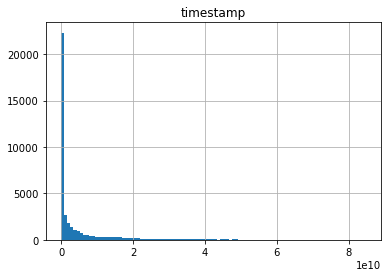

In [4]:
grouped_by_user=train.groupby('user_id')
grouped_by_user.agg({'timestamp':'max'}).hist(bins=100)

In [5]:
(train['answered_correctly']==-1).mean()

0.0195396

In [6]:
train_q_only=train[train['answered_correctly']!= -1]
train_q_only.answered_correctly.mean()


0.6586115053703342

In [7]:
grouped_by_user=train_q_only.groupby('user_id')

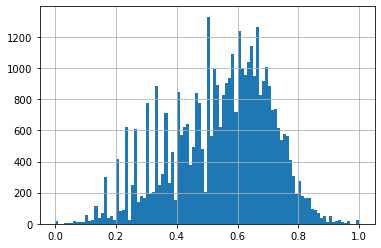

In [8]:
user_answers_df=train_q_only.groupby('user_id').agg({'answered_correctly':['mean','count']})
user_answers_df[('answered_correctly','mean')].hist(bins=100)

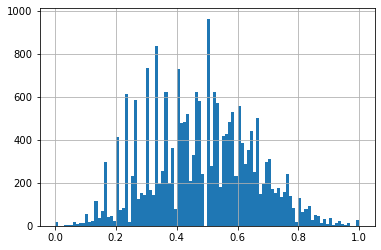

In [9]:
user_answers_df[user_answers_df[('answered_correctly','count')]< 50][('answered_correctly','mean')].hist(bins=100)


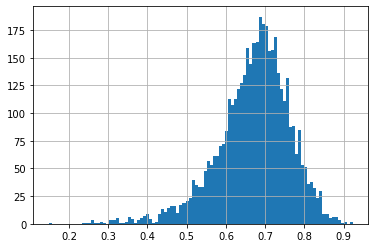

In [10]:
user_answers_df[user_answers_df[('answered_correctly','count')]>= 500][('answered_correctly','mean')].hist(bins=100)


**Answers by content**

In [11]:
grouped_by_content_df=train_q_only.groupby('content_id')

In [12]:
content_answers_df=grouped_by_content_df.agg({'answered_correctly':['count','mean']})

In [13]:
grouped_by_content_df.head()

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
row_id,,,,,,,,,
0,0,115,5692,0,1,3,1,NaN,<NA>
1,56943,115,5716,0,2,2,1,37000.0,False
2,118363,115,128,0,0,0,1,55000.0,False
3,131167,115,7860,0,3,0,1,19000.0,False
4,137965,115,7922,0,4,1,1,11000.0,False
...,...,...,...,...,...,...,...,...,...
9883835,1896430,214543269,8114,0,34,0,1,21250.0,True
9883836,1896430,214543269,8115,0,34,3,1,21250.0,True
9883837,1896430,214543269,8116,0,34,2,1,21250.0,True


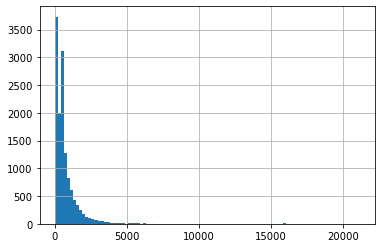

In [14]:
content_answers_df[('answered_correctly','count')].hist(bins=100)

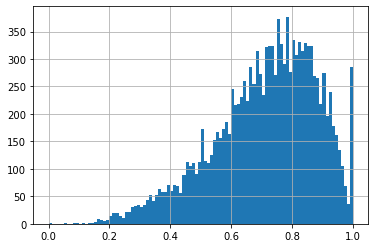

In [15]:
content_answers_df[('answered_correctly','mean')].hist(bins=100)

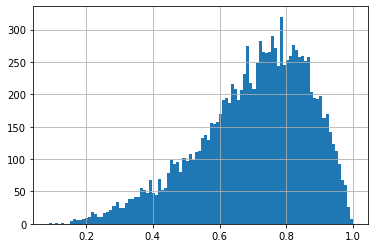

In [16]:
content_answers_df[content_answers_df['answered_correctly','count']>50][('answered_correctly','mean')].hist(bins=100)

**Questions csv**

In [17]:
unique_tags=set().union(*[y.split() for y in question['tags'].astype(str).values])
len(unique_tags)

189

In [18]:
question

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38
...,...,...,...,...,...
13518,13518,13518,3,5,14
13519,13519,13519,3,5,8
13520,13520,13520,2,5,73
13521,13521,13521,0,5,125


In [19]:
data_types_dict = {
    'row_id': 'int64',
    'timestamp': 'int64',
    'user_id': 'int32',
    'content_id': 'int16',
    'content_type_id': 'int8',
#     'task_container_id': 'int16',
#     'user_answer': 'int8',
    'answered_correctly': 'int8',
    'prior_question_elapsed_time': 'float16',
    'prior_question_had_explanation': 'boolean'
}

In [20]:
features = train.iloc[:int(9 /10 * len(train))]
train = train.iloc[int(9 /10 * len(train)):]
print(features.shape)
print(train.shape)

(9000000, 9)
(1000000, 9)


Grouped by questions answered and answered results

In [21]:
train_q=features[features.answered_correctly!=-1]
grouped_by_user=train_q.groupby('user_id')
user_answers_df=grouped_by_user.agg({'answered_correctly':['mean','count']}).copy()
user_answers_df.columns=['mean_user_accuracy','questions_answered']

In [22]:
grouped_by_content=features.groupby('content_id')
content_answers_df=grouped_by_content.agg({'answered_correctly':['mean','count']}).copy()
content_answers_df.columns=['mean_accuracy','question_Asked']

In [23]:
question=question.merge(content_answers_df,left_on='question_id',right_on='content_id',how='left')
bundle_dict = question['bundle_id'].value_counts().to_dict()

In [24]:
question['right_answers'] = question['mean_accuracy'] * question['question_Asked']
question['bundle_size'] =question['bundle_id'].apply(lambda x: bundle_dict[x])

In [25]:
question

,question_id,bundle_id,correct_answer,part,tags,mean_accuracy,question_Asked,right_answers,bundle_size
0,0,0,0,1,51 131 162 38,0.901274,628.0,566.0,1
1,1,1,1,1,131 36 81,0.889571,652.0,580.0,1
2,2,2,0,1,131 101 162 92,0.558317,4064.0,2269.0,1
3,3,3,0,1,131 149 162 29,0.779570,2046.0,1595.0,1
4,4,4,3,1,131 5 162 38,0.627244,2841.0,1782.0,1
...,...,...,...,...,...,...,...,...,...
13518,13518,13518,3,5,14,0.782051,78.0,61.0,1
13519,13519,13519,3,5,8,0.569620,79.0,45.0,1
13520,13520,13520,2,5,73,0.702703,74.0,52.0,1
13521,13521,13521,0,5,125,0.782051,78.0,61.0,1


In [26]:
grouped_by_bundle_df = question.groupby('bundle_id')
bundle_answers_df = grouped_by_bundle_df.agg({'right_answers': 'sum', 'question_Asked': 'sum'}).copy()
bundle_answers_df.columns = ['bundle_rignt_answers', 'bundle_questions_asked']
bundle_answers_df['bundle_accuracy'] = bundle_answers_df['bundle_rignt_answers'] / bundle_answers_df['bundle_questions_asked']
bundle_answers_df

,bundle_rignt_answers,bundle_questions_asked,bundle_accuracy
bundle_id,,,
0,566.0,628.0,0.901274
1,580.0,652.0,0.889571
2,2269.0,4064.0,0.558317
3,1595.0,2046.0,0.779570
4,1782.0,2841.0,0.627244
...,...,...,...
13518,61.0,78.0,0.782051
13519,45.0,79.0,0.569620
13520,52.0,74.0,0.702703


In [27]:
grouped_by_part_df = question.groupby('part')
part_answers_df = grouped_by_part_df.agg({'right_answers': 'sum', 'question_Asked': 'sum'}).copy()
part_answers_df.columns = ['part_rignt_answers', 'part_questions_asked']
part_answers_df['part_accuracy'] = part_answers_df['part_rignt_answers'] / part_answers_df['part_questions_asked']
part_answers_df

,part_rignt_answers,part_questions_asked,part_accuracy
part,,,
1,485831.0,673373.0,0.721489
2,1182262.0,1683068.0,0.702445
3,528803.0,769557.0,0.687152
4,440294.0,721274.0,0.610439
5,2174256.0,3637407.0,0.597749
6,622828.0,952863.0,0.653639
7,298042.0,455101.0,0.654892


In [28]:
import gc
gc.collect()

60

In [29]:
features = ['timestamp','mean_user_accuracy', 'questions_answered','mean_accuracy', 'question_Asked',
            'prior_question_elapsed_time', 'prior_question_had_explanation',
           'bundle_size', 'bundle_accuracy','part_accuracy', 'right_answers']
target = 'answered_correctly'

In [30]:
train_part_df = train[train[target] != -1]
train_part_df = train_part_df.merge(user_answers_df, how = 'left', on = 'user_id')
train_part_df = train_part_df.merge(question, how = 'left', left_on = 'content_id', right_on = 'question_id')
train_part_df = train_part_df.merge(bundle_answers_df, how = 'left', on = 'bundle_id')
train_part_df = train_part_df.merge(part_answers_df, how = 'left', on = 'part')


In [31]:
train_part_df

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,mean_user_accuracy,...,mean_accuracy,question_Asked,right_answers,bundle_size,bundle_rignt_answers,bundle_questions_asked,bundle_accuracy,part_rignt_answers,part_questions_asked,part_accuracy
0,9871729962,196122333,3992,0,242,0,1,19000.0,True,0.611722,...,0.867188,384.0,333.0,1,333.0,384.0,0.867188,2174256.0,3637407.0,0.597749
1,9871801320,196122333,9510,0,243,3,0,15000.0,True,0.611722,...,0.533800,429.0,229.0,1,229.0,429.0,0.533800,2174256.0,3637407.0,0.597749
2,9871852731,196122333,5214,0,244,3,1,13000.0,True,0.611722,...,0.715385,1040.0,744.0,1,744.0,1040.0,0.715385,2174256.0,3637407.0,0.597749
3,9872436636,196122333,5334,0,245,0,0,16000.0,True,0.611722,...,0.674593,2271.0,1532.0,1,1532.0,2271.0,0.674593,2174256.0,3637407.0,0.597749
4,9872617214,196122333,3722,0,246,2,1,16000.0,True,0.611722,...,0.719101,890.0,640.0,1,640.0,890.0,0.719101,2174256.0,3637407.0,0.597749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981089,646228695,216747867,8805,0,410,1,1,23000.0,True,NaN,...,0.608618,557.0,339.0,1,339.0,557.0,0.608618,2174256.0,3637407.0,0.597749
981090,646321314,216747867,5708,0,411,0,0,13000.0,True,NaN,...,0.453099,4776.0,2164.0,1,2164.0,4776.0,0.453099,2174256.0,3637407.0,0.597749
981091,646393443,216747867,5434,0,412,0,0,66000.0,True,NaN,...,0.507086,1623.0,823.0,1,823.0,1623.0,0.507086,2174256.0,3637407.0,0.597749
981092,646445632,216747867,6429,0,413,3,1,37000.0,True,NaN,...,0.541939,3517.0,1906.0,1,1906.0,3517.0,0.541939,2174256.0,3637407.0,0.597749


In [32]:
train_part_df['prior_question_had_explanation'] = train_part_df['prior_question_had_explanation'].fillna(value = False).astype(bool)
train_part_df.fillna(value = -1, inplace = True)

In [33]:
train_part_df = train_part_df[features + [target]]


In [34]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(
    num_leaves=31, 
    max_depth= 2, 
    n_estimators = 25, 
    min_child_samples = 1000, 
    subsample=0.7, 
    subsample_freq=5,
    n_jobs= -1,
    is_higher_better = True,
    first_metric_only = True
)

In [35]:
lgbm.fit(train_part_df[features], train_part_df[target])

LGBMClassifier(first_metric_only=True, is_higher_better=True, max_depth=2,
               min_child_samples=1000, n_estimators=25, subsample=0.7,
               subsample_freq=5)

In [36]:
from sklearn.metrics import roc_auc_score
roc_auc_score(train_part_df[target].values, lgbm.predict_proba(train_part_df[features])[:,1])

0.7235547157924487

In [37]:
import riiideducation

env = riiideducation.make_env()

In [38]:
iter_test = env.iter_test()


In [39]:
from sklearn.metrics import roc_auc_score

In [40]:
for (test_df, sample_prediction_df) in iter_test:
    test_df = test_df.merge(user_answers_df, how = 'left', on = 'user_id')
    test_df = test_df.merge(question, how = 'left', left_on = 'content_id', right_on = 'question_id')
    test_df = test_df.merge(bundle_answers_df, how = 'left', on = 'bundle_id')
    test_df = test_df.merge(part_answers_df, how = 'left', on = 'part')
    
    test_df['prior_question_had_explanation'] = test_df['prior_question_had_explanation'].fillna(value = False).astype(bool)
    test_df.fillna(value = -1, inplace = True)

    test_df['answered_correctly'] = lgbm.predict_proba(test_df[features])[:,1]
    env.predict(test_df.loc[test_df['content_type_id'] == 0, ['row_id', 'answered_correctly']])